# Splines

In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la

la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name="cell").astype(str))
genes = la.Dim(pd.Series(range(4), name="gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000, -0.3986, -1.6637, -1.9725, -0.3085, -0.4968, -1.1347, -2.8909,
        -3.0264, -2.3790])
tensor([-12.5642])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([genes, knots])
)

In [7]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000e+00, -1.7688e+00, -1.6216e+00, -3.0531e+00, -1.6724e+00,
          1.7820e-01, -5.9661e-02,  3.5089e-01,  1.3673e+00,  2.2401e+00],
        [ 0.0000e+00,  5.3511e-01,  1.0020e+00,  2.2925e+00,  2.6049e+00,
          4.6303e+00,  4.7632e+00,  4.0952e+00,  4.6575e+00,  4.8764e+00],
        [ 0.0000e+00, -5.1283e-01,  4.5900e-01,  5.5863e-01, -3.1492e-01,
          2.0818e-01, -3.8006e-01, -1.4954e+00, -2.2395e-01, -1.2324e+00],
        [ 0.0000e+00,  4.3057e-01,  7.7297e-01, -2.3276e-01, -8.7750e-01,
         -9.6947e-05,  1.7946e+00,  9.9645e-01,  1.1913e+00,  1.5773e+00]])
tensor([[-14.5458],
        [-11.8693],
        [-11.5093],
        [-11.5426]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([knots, genes])
)

In [10]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.5278, -1.1764,  0.7041, -0.5781],
        [-1.5774, -0.9677, -0.9878, -0.4582],
        [-3.4882, -0.5261, -0.1400, -1.3922],
        [-4.9003,  0.2174, -0.5443, -0.8927],
        [-6.1438, -0.9240,  0.4889, -0.9454],
        [-4.8210,  0.0682,  2.4406, -0.8704],
        [-6.1043,  0.4045,  3.1879, -1.3821],
        [-5.6242, -2.5154,  4.2124,  0.2663],
        [-7.2310, -1.8839,  6.0425,  0.3751]])
tensor([[-1.0582, -1.6108, -1.1668, -1.0861],
        [-1.4698, -0.9407, -2.3501, -0.9261],
        [-2.7444, -1.0165, -1.2783, -1.3551],
        [-1.9159, -1.1953, -1.0007, -1.0437],
        [-1.6921, -1.5703, -1.4527, -0.9203],
        [-1.7937, -1.4112, -2.8235, -0.9217],
        [-1.7423, -0.9755, -1.1982, -1.0498],
        [-1.0342, -5.1818, -1.4438, -2.2775],
        [-2.2098, -1.1183, -2.5935, -0.9249]])
tensor([[-15.6605, -15.0204, -15.3075, -10.5053]])
tensor([[-15.6605, -15.0204, -15.3075, -10.5053]])
tensor([[-8.2704, -8.2

In [11]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(definition=la.Definition([genes]))
)
dist.plot()

In [12]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.7752,  2.8181,  1.9356,  2.4367,  4.2401,  3.6234,  3.1054,
          4.0375,  4.0451],
        [ 0.0000,  0.0766, -1.4936, -2.4768, -1.4991, -0.5948, -0.8576,  0.2549,
          1.0110, -0.5533],
        [ 0.0000,  0.0494,  0.3287, -1.1198,  1.4504,  1.4972,  2.1566,  1.6959,
          2.7625,  2.2208],
        [ 0.0000,  0.5248, -0.3418,  0.5045,  0.9017,  1.7516,  3.1726,  2.6593,
          2.2609, -0.3021]])
tensor([[-1.2194, -3.0056, -1.3083, -1.0445, -2.5449, -1.1091, -1.0531, -1.3533,
         -0.9190],
        [-0.9219, -2.1516, -1.4024, -1.3969, -1.3278, -0.9535, -1.5378, -1.2047,
         -2.1424],
        [-0.9202, -0.9579, -1.9679, -4.2218, -0.9200, -1.1363, -1.0251, -1.4878,
         -1.0657],
        [-1.0567, -1.2945, -1.2771, -0.9978, -1.2801, -1.9286, -1.0507, -0.9983,
         -4.2034]])
tensor([[-13.5572],
        [-13.0390],
        [-13.7027],
        [-14.0871]])
tensor([[-13.5572],
        [-13.0390],
        [-13.7027],
        [-14.0871]])


In [13]:
genes = la.Dim(pd.Series(range(100), name="gene").astype(str))

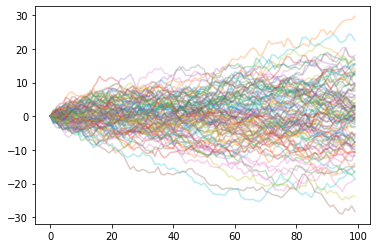

In [14]:
dist = la.distributions.RandomWalk(
    100, la.distributions.Normal(definition=la.Definition([genes]))
)
dist.run()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x=np.arange(value.shape[1]), y=value[i], alpha=0.3)

## Generative model

In [15]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name="cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 20, n_cells), index=cells.index), label="x")

In [16]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], name="gene")
knots = la.Dim(range(n_knots), name="knot")

steps = (
    np.random.choice([-1, 1], (n_genes, n_knots))
    * np.random.normal(3.0, 1.0, (n_genes, n_knots))
    * (np.random.random((n_genes, n_knots)) > 0.5)
)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims=True)
a = la.Fixed(pd.DataFrame(a_value, columns=knots.index, index=genes.index), label="a")
intercept = la.Fixed(
    pd.Series(
        np.random.choice([-1, 1], n_genes)
        * np.random.normal(3.0, 1.0, n_genes)
        * (np.random.random(n_genes) > 0.5),
        index=genes.index,
    ),
    label="intercept",
)
scale = la.Fixed(
    pd.Series(np.random.uniform(1.0, 1.2, n_genes), index=genes.index), label="scale"
)

In [17]:
y = la.links.scalar.Spline(x=x, a=a, b=intercept)
dist = la.distributions.Normal(loc=y, scale=scale, label="distribution")

In [20]:
model_gs = la.Root(dist = dist, label="ground truth", symbol="gs")
model_gs.plot()

In [21]:
posterior = la.posterior.Posterior(dist, retain_samples={dist.loc, dist})
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

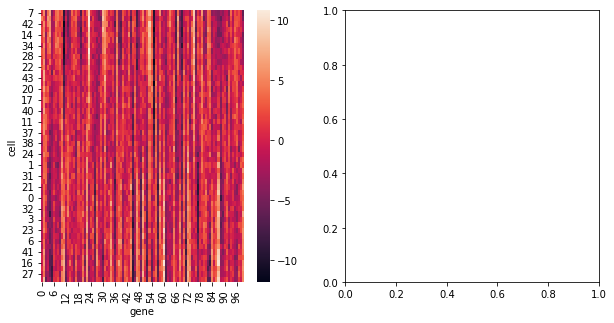

In [22]:
loc_value = posterior.samples[dist.loc].sel(sample=0).to_pandas()
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)

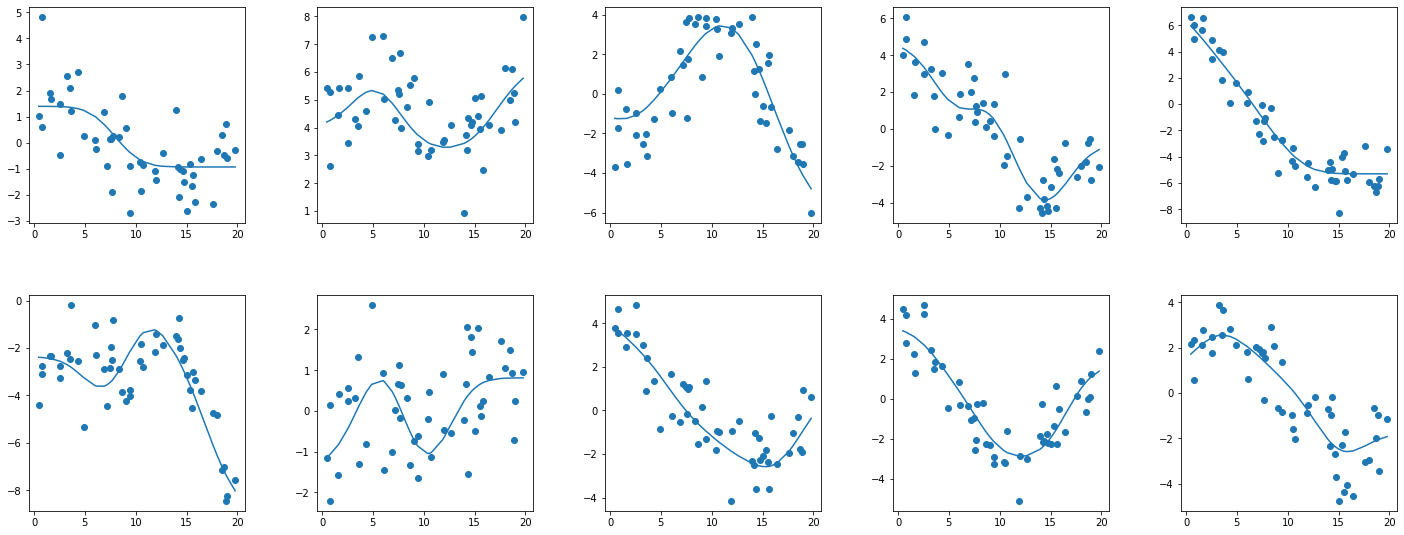

In [23]:
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find("x").prior_pd().sort_values().index
x_value = model_gs.find("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(x_value.loc[cell_order], observation_value.loc[cell_order, gene_id])
    ax.plot(x_value.loc[cell_order], loc_value.loc[cell_order, gene_id])
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [24]:
s = la.Parameter(
    1.0, definition=scale, transforms=la.distributions.Exponential().biject_to()
)

z = la.links.scalar.Spline(
    x, b=intercept, knot=model_gs.find("knot"), output=y.value_definition
)

dist = la.distributions.Normal(loc=z, scale=s)

observation = la.Observation(observation_value, dist, label="observation")

In [26]:
model = la.Root(observation = observation)
model.plot()

  0%|                                                                                                         …

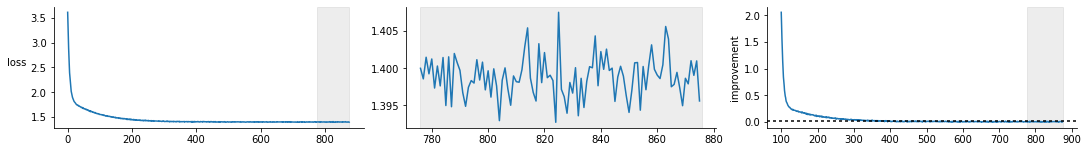

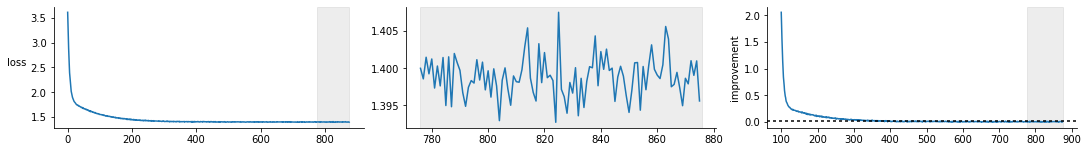

In [27]:
inference = la.infer.svi.SVI(
    model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr=0.05)
)
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot()
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [28]:
observed = la.posterior.Posterior(
    observation, retain_samples=model.components_upstream().values()
)
observed.sample(10, subsample_n=1)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

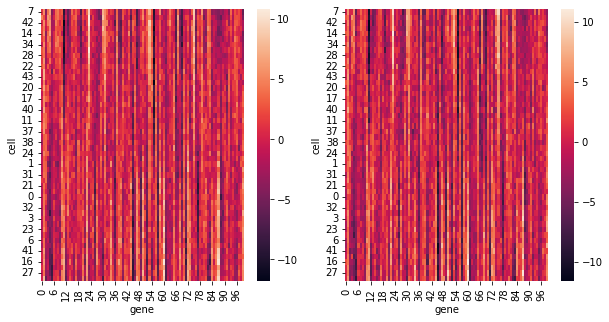

In [29]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)
modelled_value = observed.samples[observation.p].sel(sample=0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax=ax1)

In [30]:
x_causal = la.posterior.scalar.ScalarVectorCausal(x, observation)
x_causal.sample(10)

  0%|          | 0/10 [00:00<?, ?it/s]

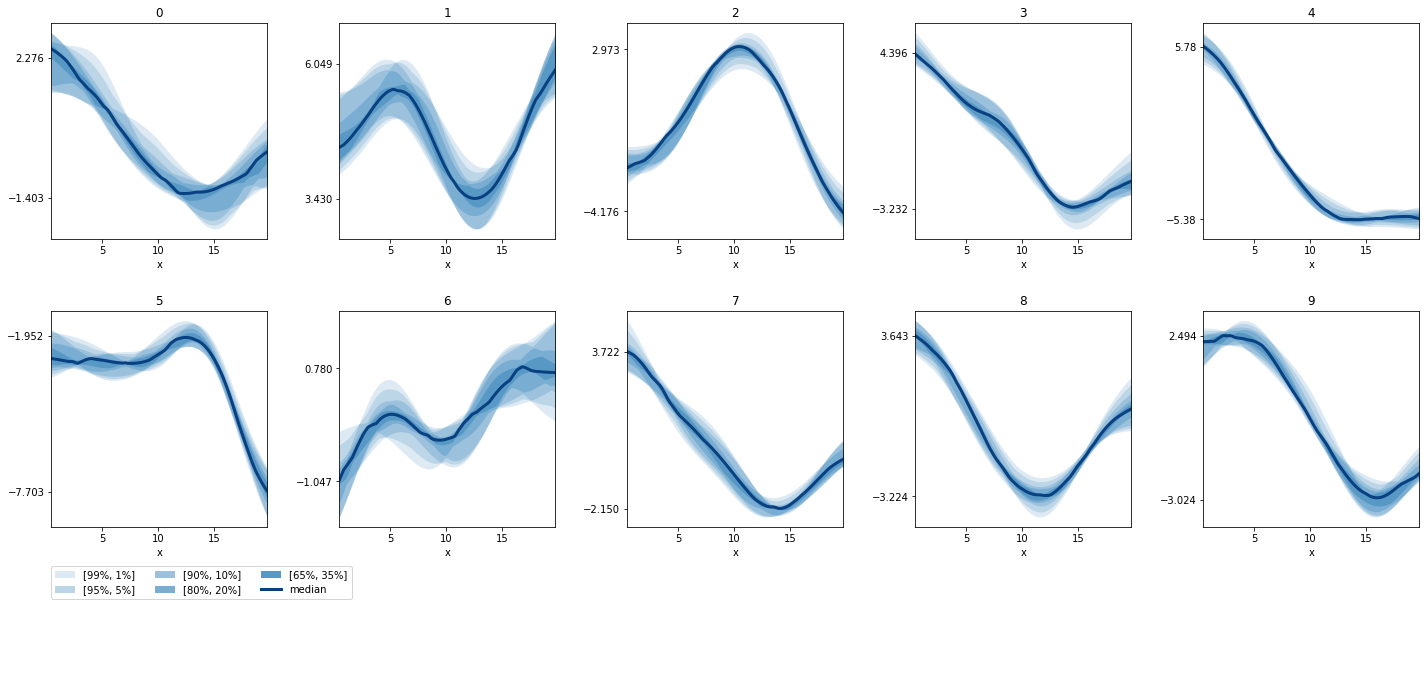

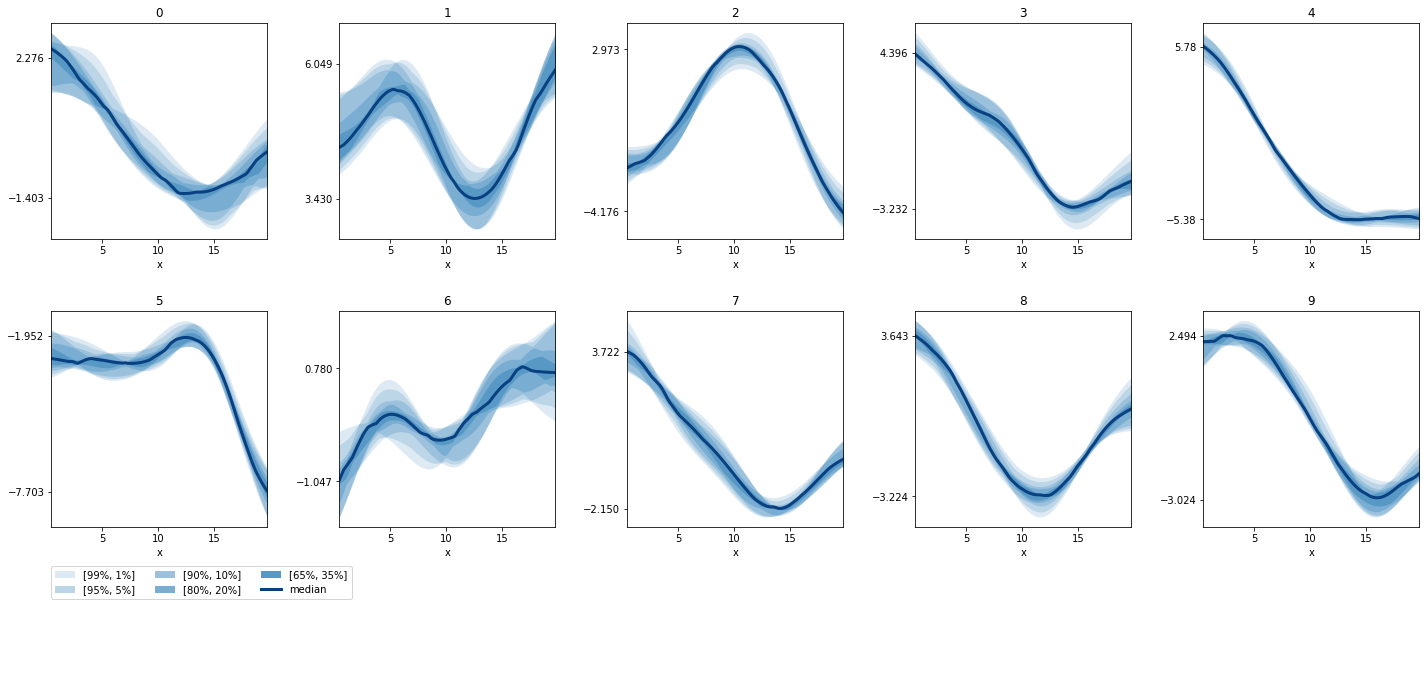

In [31]:
x_causal.plot_features()

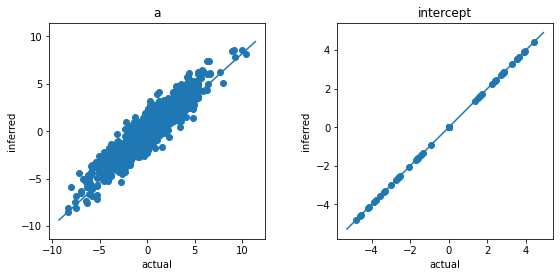

In [32]:
parameter_values = la.qa.cookbooks.check_parameters(
    la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed)
)

In [33]:
dim = la.Dim([1, 2, 3, 4], "h")

In [34]:
x_value = pd.Series([1.0, 2.0, 3.0, 0.0], index=dim.index, name="x")
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1